In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
import re
import missingno as msno
from matplotlib.pyplot import stackplot

In [84]:
df = pd.read_csv('Agriculture.csv')

In [85]:
df.head()

,NGA,Variable,Value From,Value To,Value Note,Date From,Date To,Unit,Explanation
0,Big Island Hawaii,Carbohydrate Source 1,sweet potato,NaN,NaN,750,1800,NaN,Sweet potato was the the dominant crop in the ...
1,Big Island Hawaii,Cropping System,swidden,NaN,NaN,750,1400,NaN,Shifting cultivation (in the form of swidden a...
2,Big Island Hawaii,Cropping System Coefficient,0.23,NaN,inferred,750,1400,NaN,Generic estimate
3,Big Island Hawaii,Fertilizer Coefficient,1.3,NaN,NaN,750,1900,NaN,Assuming 30% while looking for an estimate
4,Big Island Hawaii,Fertilizers,present,NaN,inferred,750,1800,NaN,Inferred ash from slash-and-burn cultivation. ...


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NGA          330 non-null    object
 1   Variable     330 non-null    object
 2   Value From   330 non-null    object
 3   Value To     53 non-null     object
 4   Value Note   36 non-null     object
 5   Date From    330 non-null    int64 
 6   Date To      330 non-null    int64 
 7   Unit         61 non-null     object
 8   Explanation  330 non-null    object
dtypes: int64(2), object(7)
memory usage: 23.3+ KB


Text(0.5, 1.0, 'Type of dataset')

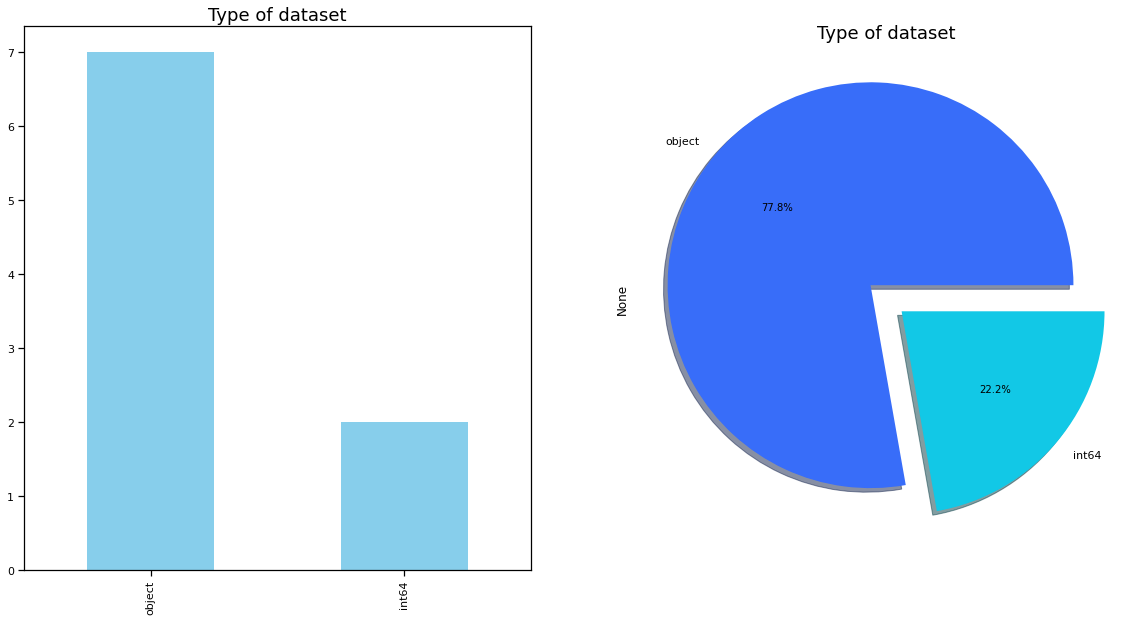

In [87]:
fig, axarr = plt.subplots(1,2, figsize=(20,10))

df.dtypes.value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow =True, ax=axarr[1])
axarr[1].set_title('Type of dataset', fontsize=18)

df.dtypes.value_counts().plot(kind='bar', ax=axarr[0], color='skyblue')
axarr[0].set_title('Type of dataset', fontsize=18)

In [88]:
df.isnull().sum()

NGA              0
Variable         0
Value From       0
Value To       277
Value Note     294
Date From        0
Date To          0
Unit           269
Explanation      0
dtype: int64

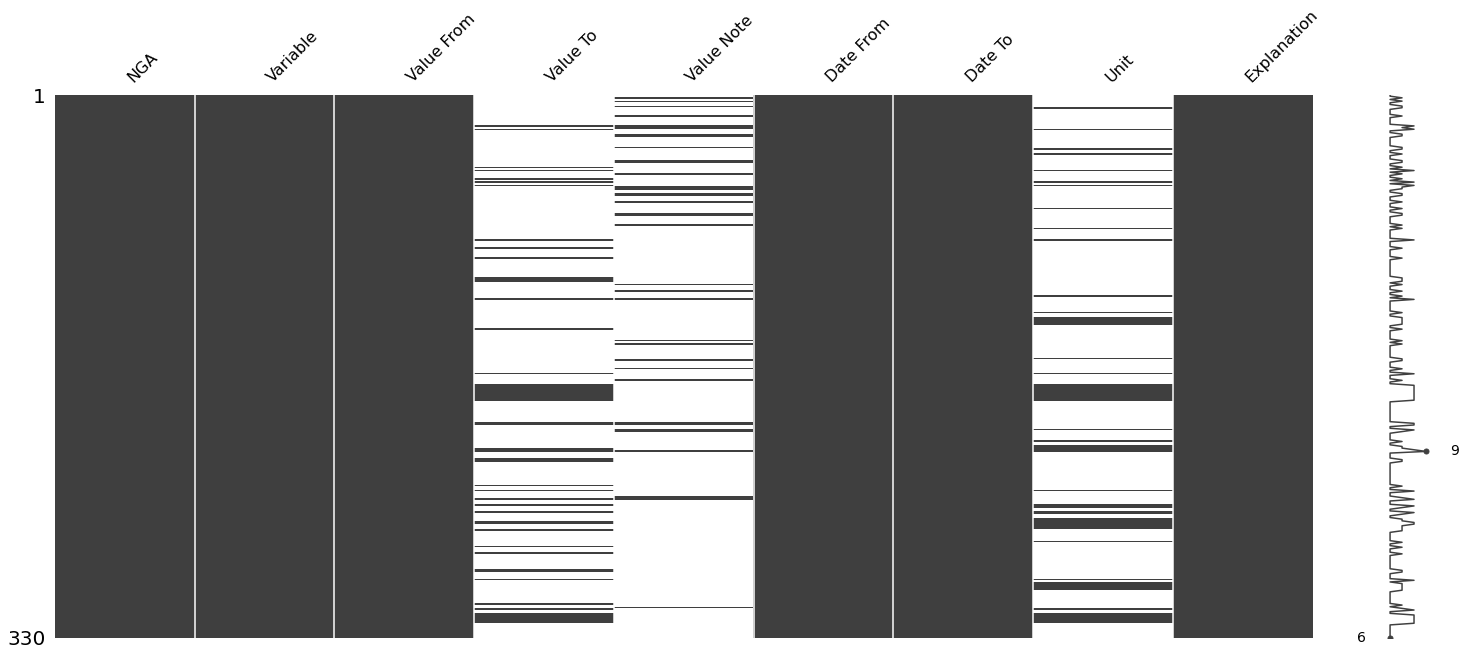

In [89]:
msno.matrix(df)

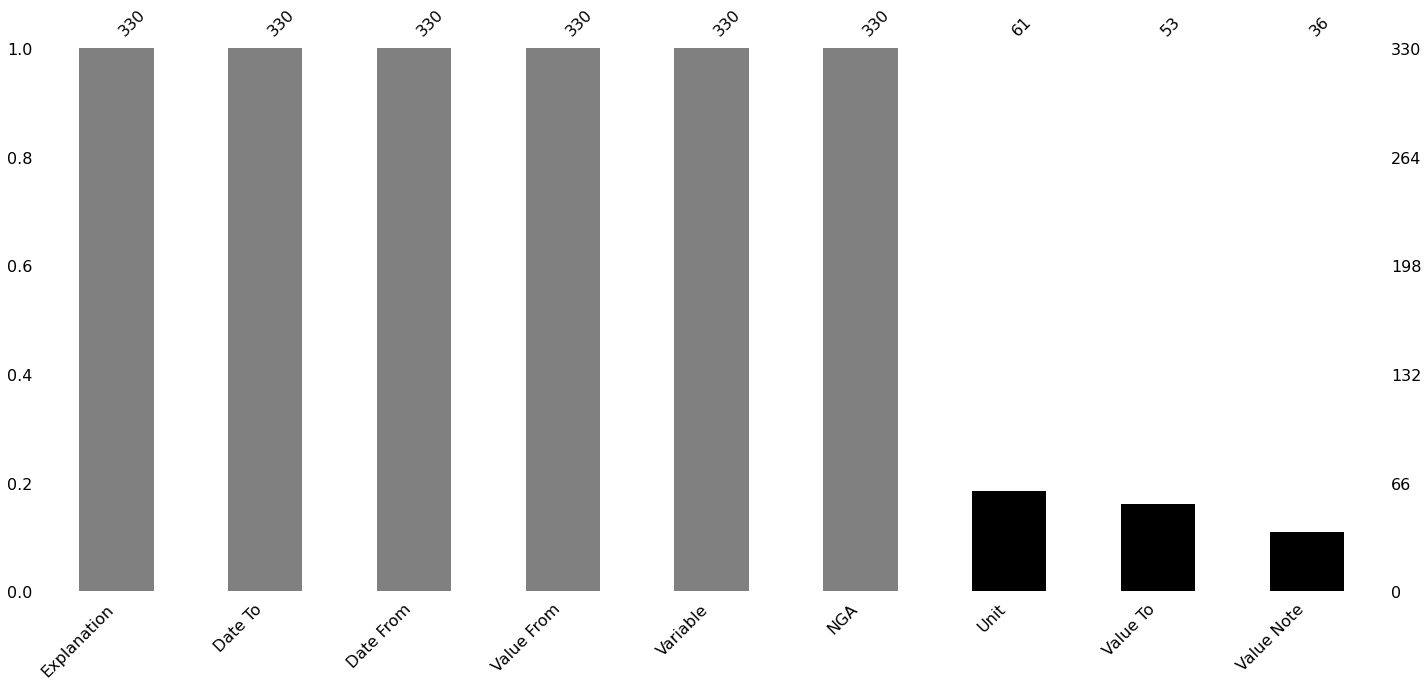

In [90]:
color = ['grey','grey','grey','grey', 'grey', 'grey', 'black', 'black', 'black']
msno.bar(df, sort='descending', color=color)

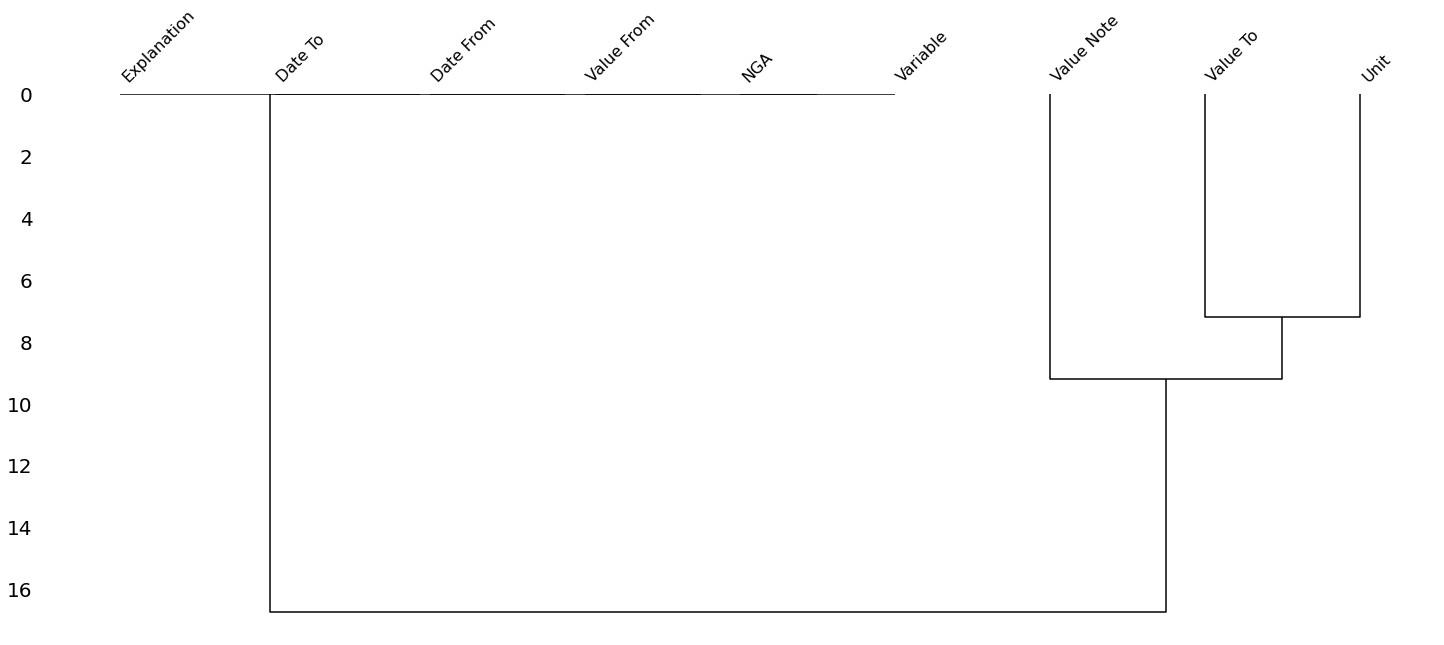

In [91]:
msno.dendrogram(df)

In [92]:
df.NGA.value_counts()

Latium                        24
Paris Basin                   23
Valley of Oaxaca              20
Middle Yellow River Valley    19
Kansai                        17
Konya Plain                   16
Kachi Plain                   15
Cambodian Basin               15
Cuzco                         14
Deccan                        12
Big Island Hawaii             12
Susiana                       12
Upper Egypt                   11
Niger Inland Delta            10
Cahokia                       10
Central Java                  10
Chuuk Islands                  9
Yemeni Coastal Plain           9
Finger Lakes                   9
Sogdiana                       8
North Colombia                 7
Lena River Valley              7
Garo Hills                     6
Oro PNG                        6
Southern China Hills           6
Ghanaian Coast                 6
Kapuasi Basin                  6
Lowland Andes                  5
Iceland                        5
Orkhon Valley                  1
Name: NGA,

In [93]:
df['Variable'].value_counts()

Historical Productivity        62
Cropping System                55
Cropping System Coefficient    54
Fertilizers                    40
Irrigation                     40
Carbohydrate Source 1          36
Fertilizer Coefficient         26
Irrigation Coefficient         16
HIstorical Productivity         1
Name: Variable, dtype: int64

In [94]:
df['Variable'].replace(to_replace='HIstorical Productivity',value='Historical Productivity', inplace=True)

In [95]:
df['Variable'].value_counts()

Historical Productivity        63
Cropping System                55
Cropping System Coefficient    54
Fertilizers                    40
Irrigation                     40
Carbohydrate Source 1          36
Fertilizer Coefficient         26
Irrigation Coefficient         16
Name: Variable, dtype: int64

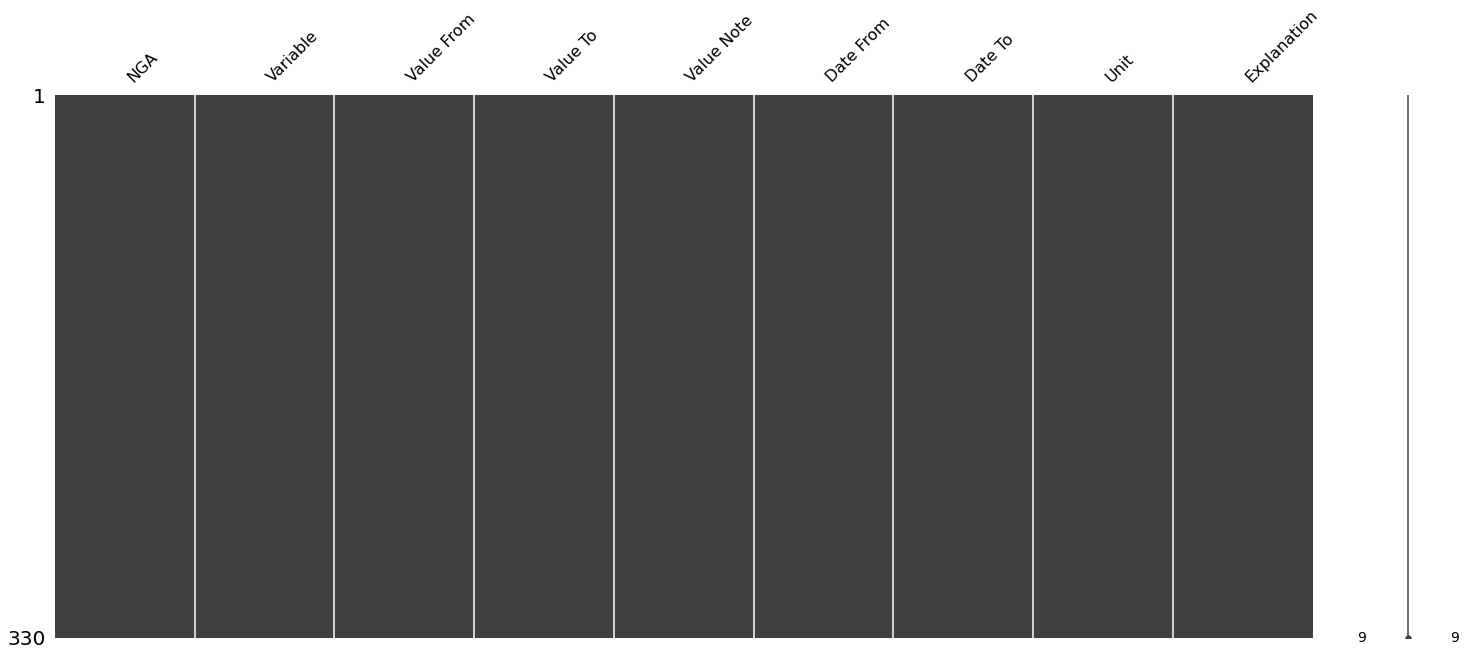

In [96]:
df=df.fillna(0)
msno.matrix(df)

In [97]:
df.describe()

,Date From,Date To
count,330.000000,330.000000
mean,-1536.809091,1059.727273
std,2867.255946,1447.224197
min,-10000.000000,-7000.000000
25%,-3000.000000,710.000000
50%,-800.000000,1810.000000
75%,930.000000,1914.250000
max,2000.000000,2001.000000


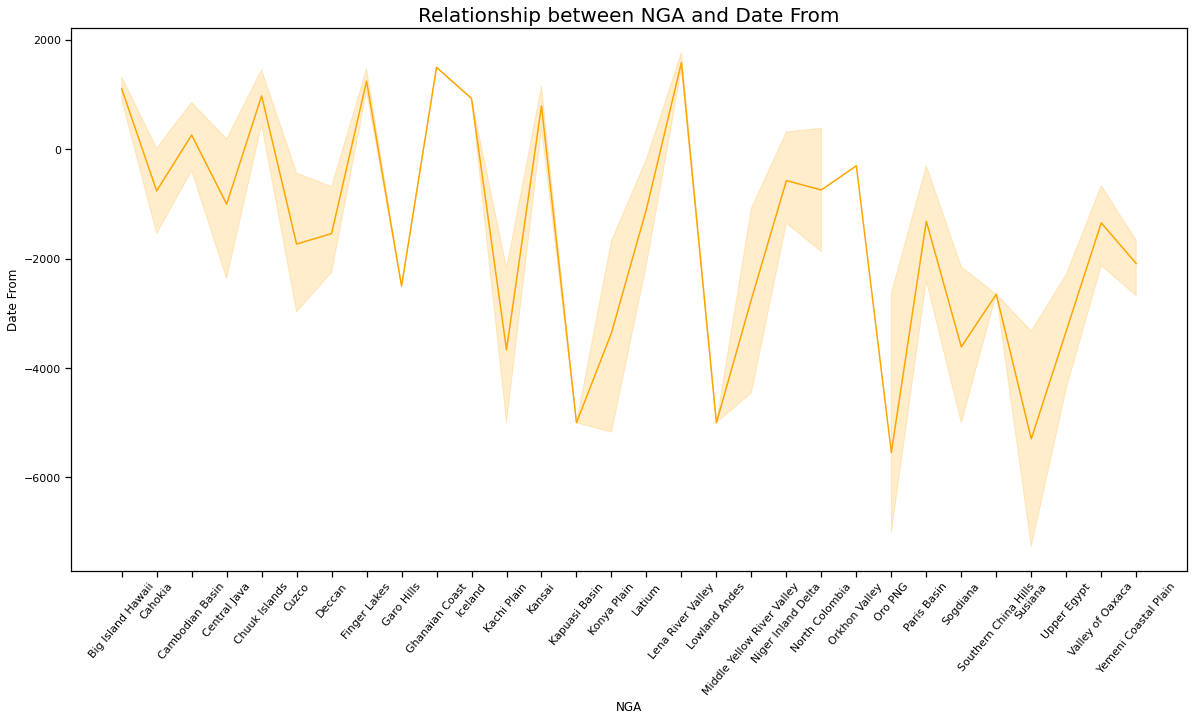

In [98]:
plt.figure(figsize=(20,10))
sns.lineplot(x='NGA', y='Date From', data=df, color='orange')
plt.xticks(rotation=50)
plt.title('Relationship between NGA and Date From', fontsize=20)
plt.show()

Text(0.5, 1.0, 'NGA counts')

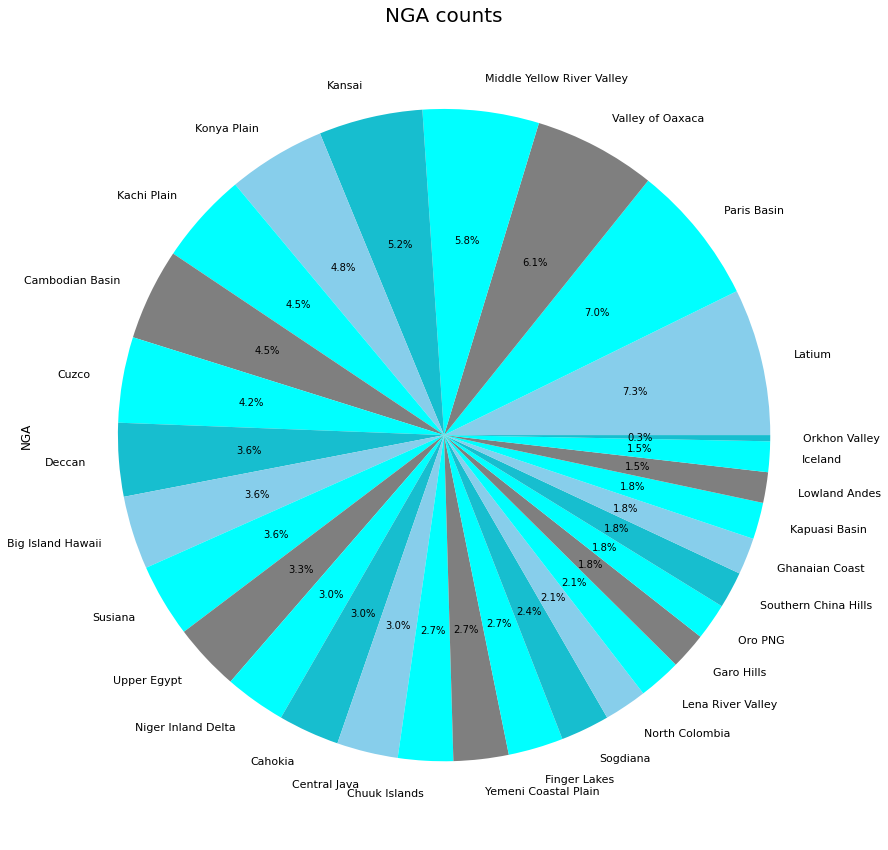

In [99]:
plt.figure(figsize=(20,15))
mycolrs=['skyblue', 'cyan', '#7f7f7f', 'aqua', '#17becf']
df.NGA.value_counts().plot.pie(autopct='%1.1f%%', colors=mycolrs)
plt.title('NGA counts', fontsize=20)

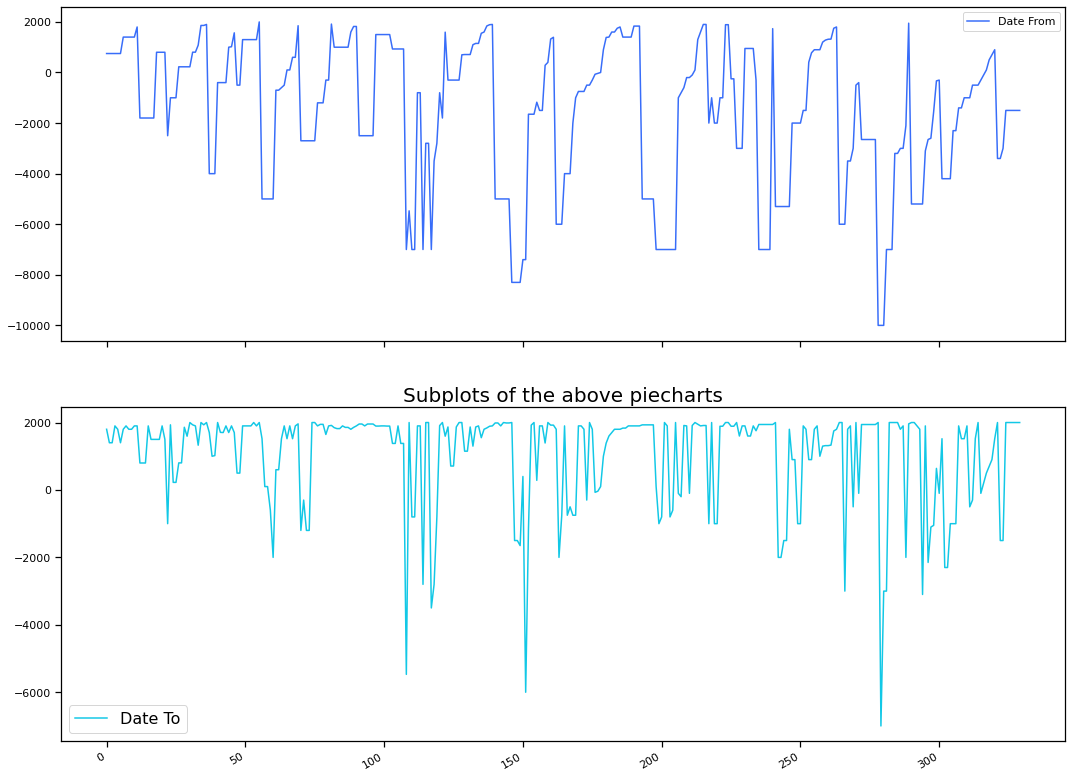

In [103]:
df.plot(subplots=True, figsize=(18,15))
plt.legend(fontsize=16)
plt.title('Subplots of the above piecharts', fontsize=20)
plt.show() #subplots of the above piechart

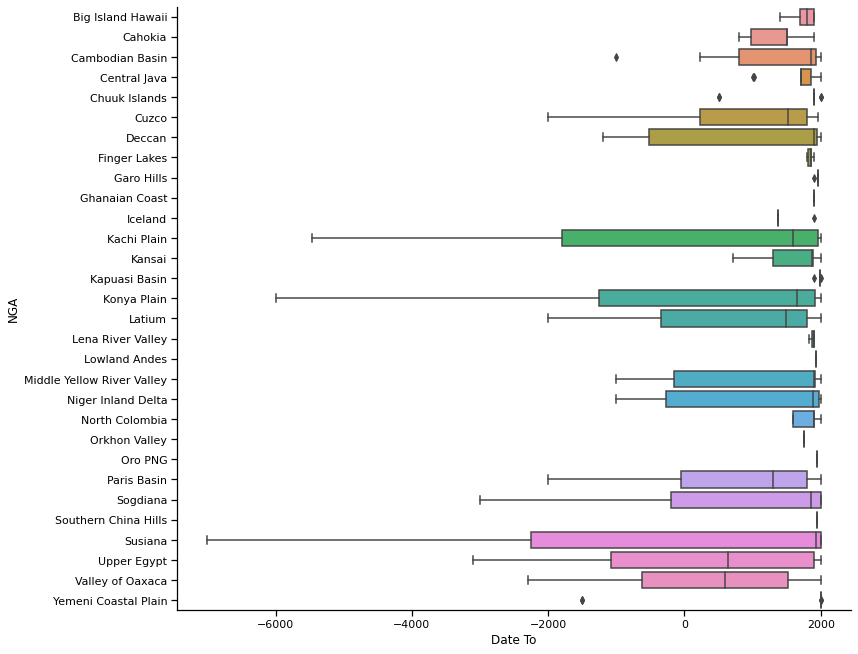

In [104]:
nga=sns.catplot(x='Date To', y='NGA', kind='box', data=df.sort_values('NGA'))
nga.fig.set_figheight(10)
nga.fig.set_figwidth(20)

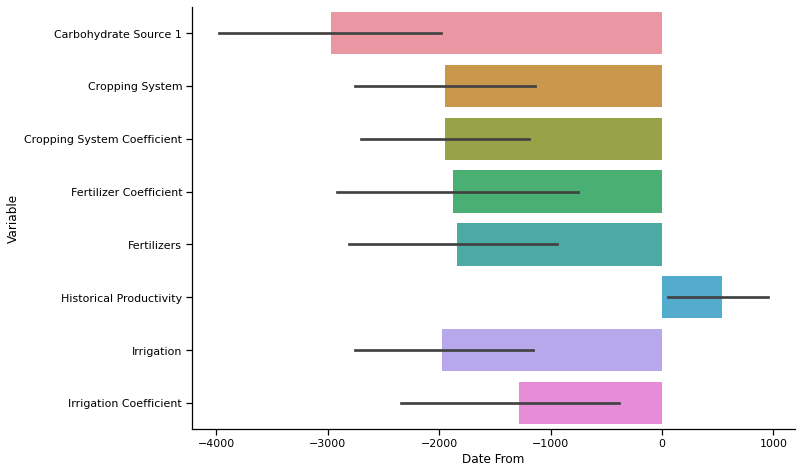

In [105]:
var= sns.catplot(x='Date From', y='Variable', data=df.sort_values('Variable'), kind='bar')
var.fig.set_figheight(7)
var.fig.set_figwidth(20)

In [106]:
df_yield=df[(df.Unit=='t/ha')]
df_yield

,NGA,Variable,Value From,Value To,Value Note,Date From,Date To,Unit,Explanation
8,Big Island Hawaii,Historical Productivity,3.25,0,0,1400,1800,t/ha,This figure was derived from the mean yield fo...
21,Cahokia,Historical Productivity,0.672,1.681,0,800,1500,t/ha,"""Native maize yields were inherently low and u..."
33,Cambodian Basin,Historical Productivity,1.46,0,0,1080,1327,t/ha,"""Acker has given detailed consideration to the..."
36,Cambodian Basin,Historical Productivity,2.5,0,0,1900,2000,t/ha,An average household is composed of five to si...
46,Central Java,Historical Productivity,1.345,1.681,0,1568,1703,t/ha,"""Even under considerable variation in growing ..."
...,...,...,...,...,...,...,...,...,...
316,Valley of Oaxaca,Historical Productivity,0.7,1,0,-100,200,t/ha,Kowalewski 1980 (see above)
317,Valley of Oaxaca,Historical Productivity,0.8,1.1,0,100,500,t/ha,Kowalewski 1980 (see above)
318,Valley of Oaxaca,Historical Productivity,1,1.4,0,500,700,t/ha,The estimates for the highest quality land (Cl...
319,Valley of Oaxaca,Historical Productivity,1.1,1.5,0,700,900,t/ha,Kowalewski 1980 (see above)


In [107]:
df_yield['NGA'].value_counts()

Latium                        11
Paris Basin                   11
Valley of Oaxaca               7
Kansai                         6
Upper Egypt                    6
Middle Yellow River Valley     6
Cambodian Basin                2
Chuuk Islands                  2
Deccan                         1
Big Island Hawaii              1
Cuzco                          1
Central Java                   1
Oro PNG                        1
Kachi Plain                    1
Cahokia                        1
Konya Plain                    1
Sogdiana                       1
Finger Lakes                   1
Name: NGA, dtype: int64

In [108]:
df_yield['Variable'].unique()

array(['Historical Productivity'], dtype=object)

In [109]:
df_yield['Value From'].unique()

array(['3.25', '0.672', '1.46', '2.5', '1.345', '16', '10', '1.2',
       '1.371', '0.5', '1.096', '1.3', '1.55', '1.5', '1.9', '2.1', '2.2',
       '1', '0.376', '1.296', '1.35', '0.54', '0.23', '0.675', '0.878',
       '0.405', '0.258', '1.05', '0.75', '0.8', '0.25', '6.5', '0.65',
       '0.308', '0.773', '1.624', '1.16', '1.933', '2.22', '0.62', '1.07',
       '1.71', '1.425', '1.665', '1.075', '0.6', '0.7', '1.1', '1.4'],
      dtype=object)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NGA          330 non-null    object
 1   Variable     330 non-null    object
 2   Value From   330 non-null    object
 3   Value To     330 non-null    object
 4   Value Note   330 non-null    object
 5   Date From    330 non-null    int64 
 6   Date To      330 non-null    int64 
 7   Unit         330 non-null    object
 8   Explanation  330 non-null    object
dtypes: int64(2), object(7)
memory usage: 23.3+ KB


In [111]:
df_yield[['Value From', 'Value To']]= df_yield[['Value From', 'Value To']].apply(pd.to_numeric)
df_yield.dtypes

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



NGA             object
Variable        object
Value From     float64
Value To       float64
Value Note      object
Date From        int64
Date To          int64
Unit            object
Explanation     object
dtype: object

In [112]:
import plotly.express as px

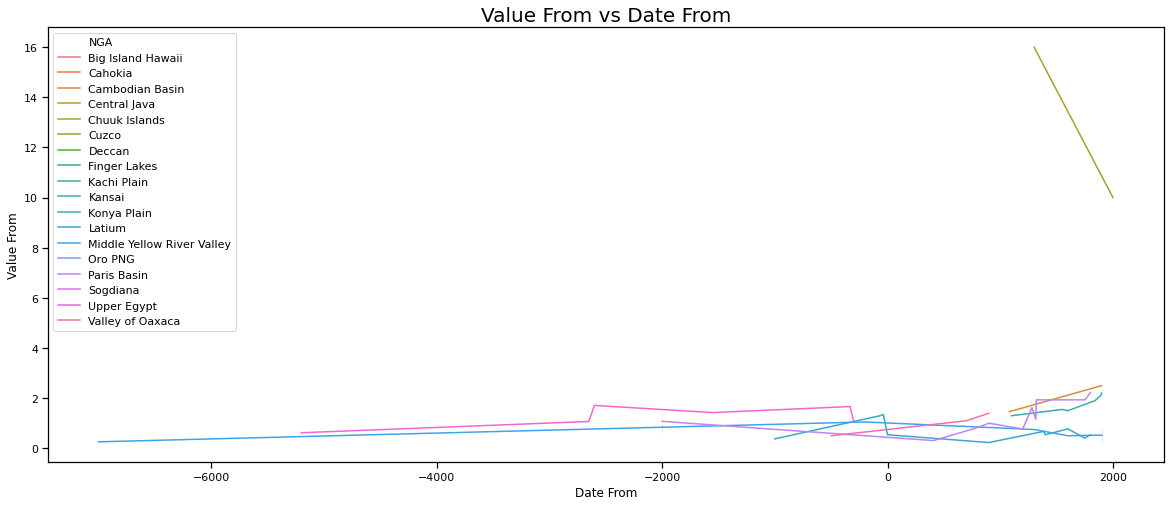

In [113]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_yield, x='Date From', y='Value From', hue='NGA')
plt.title('Value From vs Date From', fontsize=20)
plt.show()

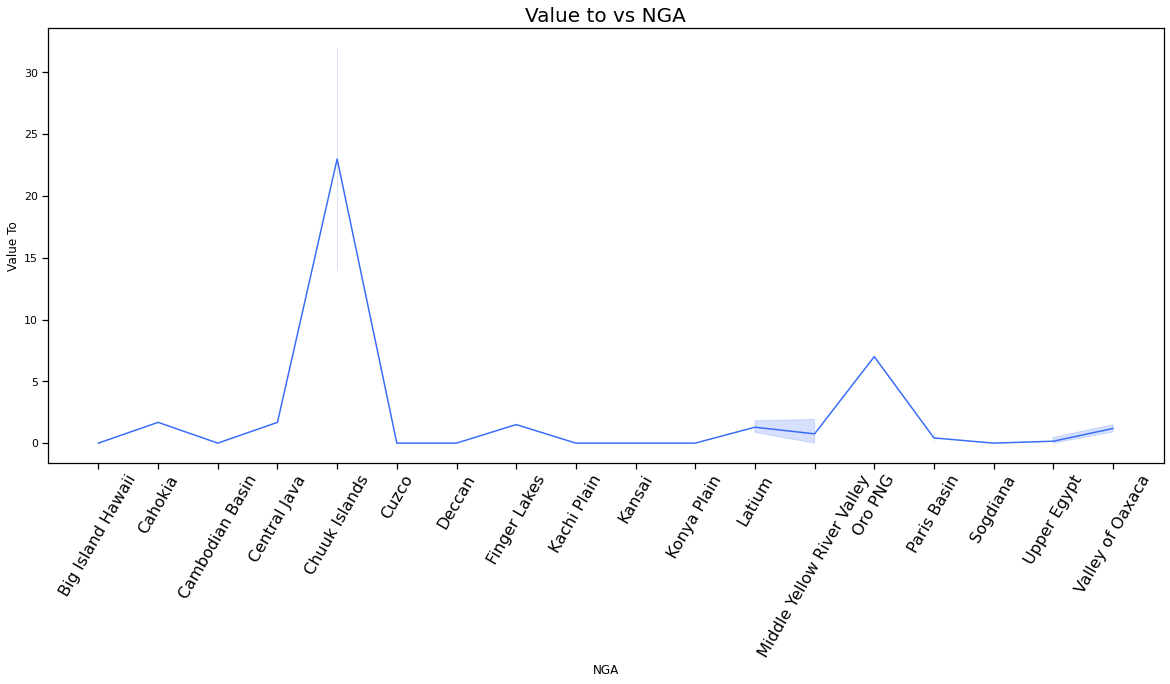

In [114]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df_yield, x='NGA', y='Value To')
plt.xticks(rotation=60, fontsize=16)
plt.title('Value to vs NGA', fontsize=20)
plt.show()

In [115]:
df_carb_source = df[(df.Variable == 'Carbohydrate Source 1')]
df_carb_source

,NGA,Variable,Value From,Value To,Value Note,Date From,Date To,Unit,Explanation
0,Big Island Hawaii,Carbohydrate Source 1,sweet potato,0,0,750,1800,0,Sweet potato was the the dominant crop in the ...
12,Cahokia,Carbohydrate Source 1,chenopod,0,0,-1800,800,0,Smith and Yarnell 2009
18,Cahokia,Carbohydrate Source 1,maize,0,0,800,1500,0,Need reference
22,Cambodian Basin,Carbohydrate Source 1,rice,0,0,-2500,-1000,0,Bellwood (2005) dates the beginning of the Neo...
23,Cambodian Basin,Carbohydrate Source 1,rice,0,0,-1000,1932,0,"""The staples of their diet were rice and fish,..."
37,Central Java,Carbohydrate Source 1,rice,0,0,-4000,1703,0,"""Recent genetic work tells us that rice, Oryza..."
49,Chuuk Islands,Carbohydrate Source 1,breadfruit,0,0,1300,1900,0,"""In Chuuk the subsistence base of the earliest..."
56,Cuzco,Carbohydrate Source 1,maize,0,inferred,-5000,1520,0,While the Lake Marcacohca pollen cores can ind...
70,Deccan,Carbohydrate Source 1,millet,0,0,-2700,-1200,0,"2700-1200 BCE: ""Cattle and caprine pastoralism..."
76,Deccan,Carbohydrate Source 1,rice,0,0,-1200,1900,0,"""With the expansion in irrigation, rice cultiv..."


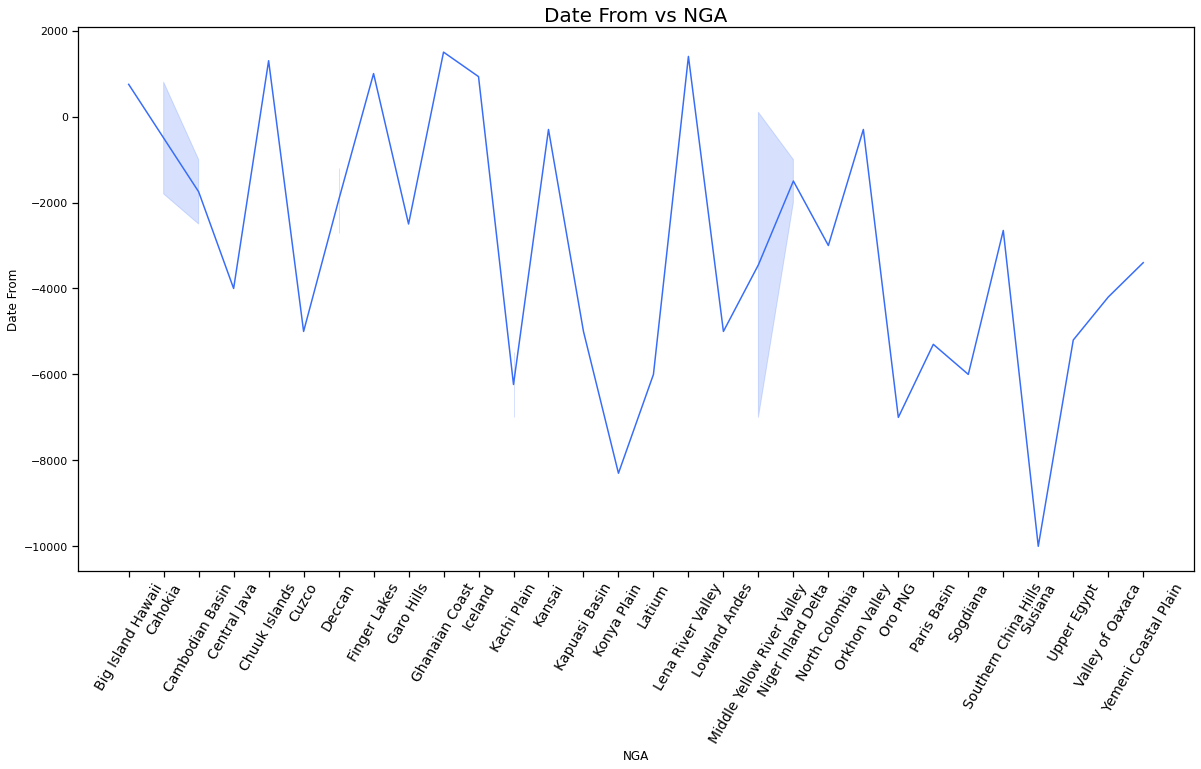

In [116]:
plt.figure(figsize=(20,10))
sns.lineplot(data= df_carb_source, x='NGA', y='Date From')
plt.xticks(rotation=60, fontsize=14)
plt.title('Date From vs NGA', fontsize=20)
plt.show()

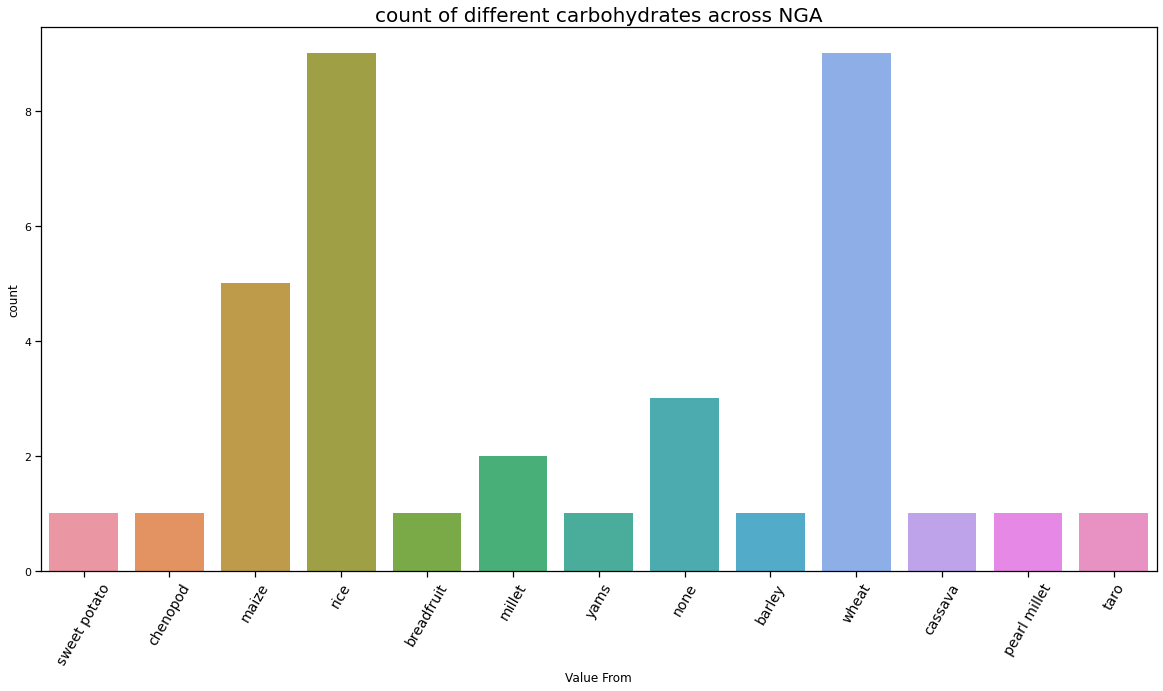

In [117]:
plt.figure(figsize=(20,10))
sns.countplot(data=df_carb_source, x='Value From')
plt.xticks(rotation=60, fontsize=14)
plt.title('count of different carbohydrates across NGA', fontsize=20)
plt.show()

In [118]:
df_irrigation = df[(df.Variable == 'Irrigation Coefficient')]
df_irrigation[['Value From', 'Value To']]=df_irrigation[['Value From', 'Value To']].apply(pd.to_numeric)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [119]:
df_irrigation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 10 to 329
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NGA          16 non-null     object 
 1   Variable     16 non-null     object 
 2   Value From   16 non-null     float64
 3   Value To     16 non-null     int64  
 4   Value Note   16 non-null     object 
 5   Date From    16 non-null     int64  
 6   Date To      16 non-null     int64  
 7   Unit         16 non-null     object 
 8   Explanation  16 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.2+ KB


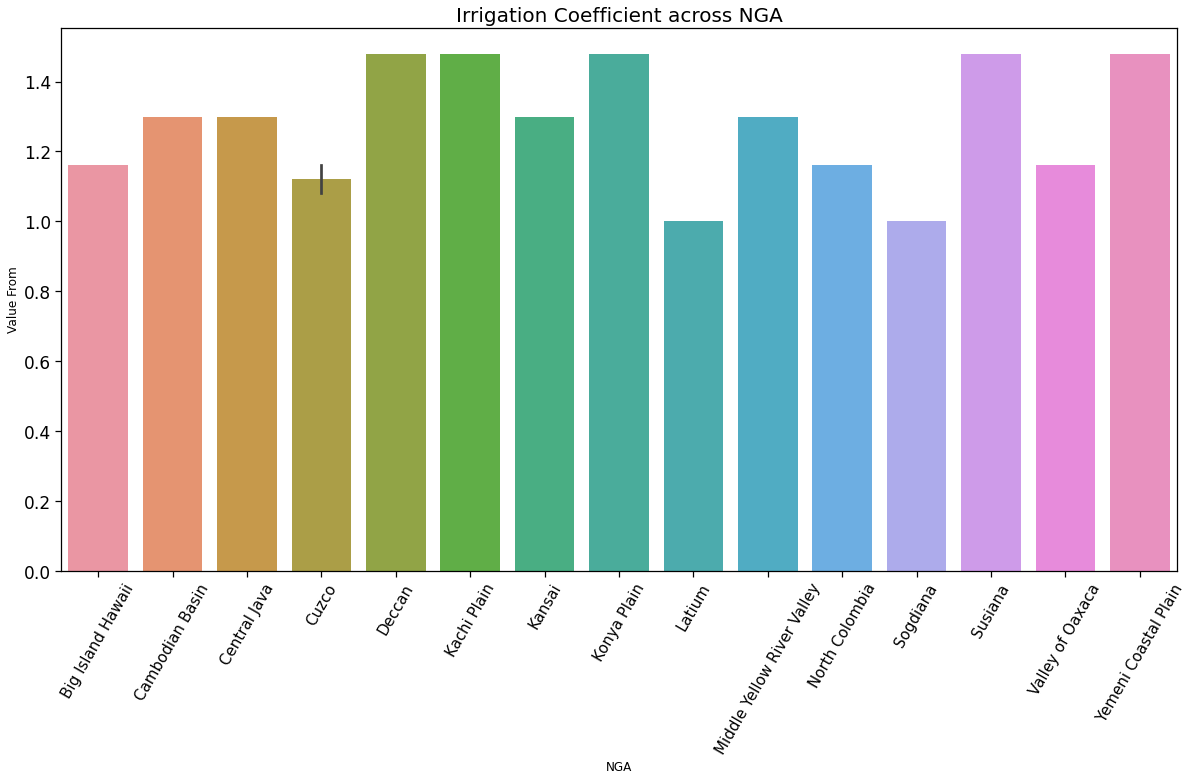

In [120]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_irrigation, x='NGA', y='Value From')
plt.xticks(rotation=60, fontsize=15)
plt.yticks(fontsize=17)
plt.title('Irrigation Coefficient across NGA', fontsize=20)
plt.show()

In [121]:
df_fertilizer = df[(df.Variable=='Fertilizer Coefficient')]
df_fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 3 to 326
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   NGA          26 non-null     object
 1   Variable     26 non-null     object
 2   Value From   26 non-null     object
 3   Value To     26 non-null     object
 4   Value Note   26 non-null     object
 5   Date From    26 non-null     int64 
 6   Date To      26 non-null     int64 
 7   Unit         26 non-null     object
 8   Explanation  26 non-null     object
dtypes: int64(2), object(7)
memory usage: 2.0+ KB


In [122]:
df_fertilizer[['Value From', 'Value To']]=df_fertilizer[['Value From', 'Value To']].apply(pd.to_numeric)
df_fertilizer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 3 to 326
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NGA          26 non-null     object 
 1   Variable     26 non-null     object 
 2   Value From   26 non-null     float64
 3   Value To     26 non-null     int64  
 4   Value Note   26 non-null     object 
 5   Date From    26 non-null     int64  
 6   Date To      26 non-null     int64  
 7   Unit         26 non-null     object 
 8   Explanation  26 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 2.0+ KB


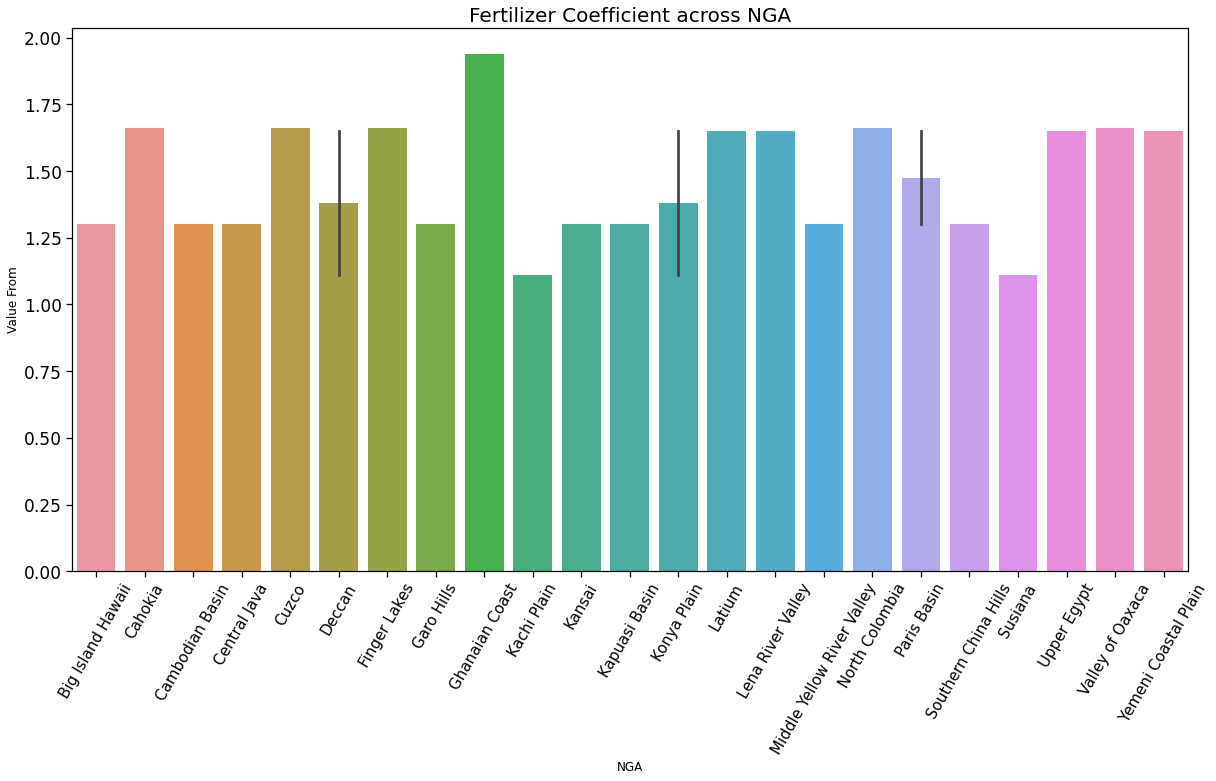

In [123]:
plt.figure(figsize=(20,10))
sns.barplot(data=df_fertilizer, x='NGA', y='Value From')
plt.xticks(rotation=60, fontsize=15)
plt.yticks(fontsize=17)
plt.title('Fertilizer Coefficient across NGA', fontsize=20)
plt.show()

In [ ]:
THANK YOU :))